# imports

In [4]:
!pip install newsapi-python

In [5]:
!pip install yfinance

In [6]:
! pip install nltk

In [7]:
import nltk
### Uncomment it when the script runs for the first time 
nltk.download('vader_lexicon')

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /data/home/pelegdav/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Obtain access key to newAPI
* get a free key on the website https://newsapi.org
* NEWS_API_KEY = personal api key

In [13]:
from newsapi import NewsApiClient
import newsapi
#from newsapi.newsapi_client import NewsApiClient
from datetime import date, timedelta, datetime

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [9]:
# Show full output in Colab
# https://stackoverflow.com/questions/54692405/output-truncation-in-google-colab
pd.set_option('display.max_colwidth',1000)

In [10]:
# Init news api
NEWS_API_KEY = '2adc9646b17746ffbd42e9526c1443e1'

# '1900869fa01647fca0bdc19b4550daa0'

### See all sources available

In [15]:
news_client = NewsApiClient(api_key= NEWS_API_KEY)
# the list of available categories to choose from
print('categories:', newsapi.const.categories)

sources = news_client.get_sources(category='business', language='en')

categories: {'technology', 'business', 'general', 'entertainment', 'science', 'sports', 'health'}


In [18]:
source_names = [source['id'] for source in sources['sources']]
print(source_names)

['australian-financial-review', 'bloomberg', 'business-insider', 'business-insider-uk', 'financial-post', 'fortune', 'the-wall-street-journal']


# News API example

In [48]:
from tqdm import tqdm
#https://newsapi.org/docs/endpoints/everything
tot_articles = []
# datetime.strptime('10-Apr-2021','%d-%b-%Y')
for i in tqdm(range(1, 35)):
    start_date = date.today() - timedelta(days=i)
    end_date = date.today() - timedelta(days=i+1)
    articles = news_client.get_everything(from_param=start_date.isoformat(), to=end_date.isoformat(), language="en", sources=",".join(source_names), sort_by="relevancy")
    tot_articles.extend(articles['articles'])

TypeError: 'module' object is not callable

In [40]:
len(tot_articles)

2900

In [41]:
articles_df = pd.DataFrame(tot_articles)

In [42]:
# apply a map function to the source column to get the source name
articles_df['source'] = articles_df['source'].map(lambda x: x['id'])

In [46]:
# count the number of rows in a dataframe
print(articles_df.shape)
# get all unique values in a column
print(articles_df['source'].unique())
articles_df.head()

(2900, 8)
['business-insider' 'the-wall-street-journal' 'bloomberg'
 'australian-financial-review' 'fortune']


,source,author,title,description,url,urlToImage,publishedAt,content
0,business-insider,kwebb@businessinsider.com (Kevin Webb),The NFL Playoffs begin January 14 — here's how to livestream every Wild Card game,"The Wild Card round of the NFL playoffs features six games spread throughout the holiday weekend on CBS, Fox, NBC, ABC, and ESPN.",https://www.businessinsider.com/guides/streaming/how-to-watch-nfl-playoffs-2023-1,https://i.insider.com/63979780a3bebb0018b42219?width=1200&format=jpeg,2023-01-13T22:00:00Z,"When you buy through our links, Insider may earn an affiliate commission. Learn more.\r\nThe NFL Playoffs begin January 14 with six games set to run across Saturday, Sunday, and Monday in the Wild Card… [+2753 chars]"
1,business-insider,"litaliano@insider.com (Laura Italiano,Ashley Collman)",Trump said he 'can't think of any complaints' when asked if he ever forcibly kissed a woman; 26 have accused him of sexual assault,"In a newly-released deposition in the E. Jean Carroll defamation case, Trump makes no mention of the 26 women who say he sexually attacked them.",https://www.businessinsider.com/trump-cant-think-of-any-complaints-that-he-forcibly-kissed-woman-2023-1,https://i.insider.com/63c1e2b1cddf2c00196e3275?width=1200&format=jpeg,2023-01-14T01:27:38Z,"Donald Trump was asked by a lawyer for rape accuser E. Jean Carroll if he'd ever forcibly kissed a woman, according to newly unsealed court documents.\r\nThe former president said he was unaware of any… [+2118 chars]"
2,business-insider,insider@insider.com (Jake Swearingen),The contender for tech's next big boom or bubble is here,It's always fun to predict a bubble because if you're right you look smart and if you're wrong nobody remembers.,https://www.businessinsider.com/the-candidate-for-techs-next-big-boom-or-bubble-is-here-2023-1,https://www.businessinsider.com/public/assets/BI/US/og-image-logo-social.png,2023-01-13T11:40:00Z,"Hiya, I'm Jake Swearingen, a deputy editor on Insider's tech analysis desk, stepping in for Diamond Naga Siu.\r\nBubbles! It's always fun to predict them, because if you're right you look smart and if … [+5175 chars]"
3,business-insider,htan@insider.com (Huileng Tan),"Tesla has slashed the prices of its Model 3 sedan and Model Y SUV between 6% and 20% in the US, as it reverses strategy after demand tapers","Tesla had hiked prices several times in 2022 amid supply chain disruptions, even though there were concerns about a broader economic slowdown.",https://www.businessinsider.com/elon-musk-tesla-cuts-us-electric-vehicle-prices-slowing-demand-2023-1,https://i.insider.com/63c0f9ce33ffb700180f90a7?width=1200&format=jpeg,2023-01-13T09:35:40Z,"Tesla buyers in the US and part of Europe can now rejoice the electric vehicle, or EV, is now cheaper by up to one-fifth of its cost. \r\nThe price cut mirrors those in other markets, after the EV make… [+2115 chars]"
4,business-insider,bnolan@insider.com (Beatrice Nolan),Art collector says a Van Gogh painting that he owns went missing for nearly six years and resurfaced in a Detroit gallery,"The collector said in a lawsuit that he transferred possession of the painting to a third party, who then absconded with it.",https://www.businessinsider.com/van-gogh-painting-detroit-institute-of-art-2023-1,https://i.insider.com/63c140d333ffb700180f93ea?width=1200&format=jpeg,2023-01-13T13:12:47Z,"A Brazilian art collector has issued a lawsuit to try and obtain a Vincent Van Gogh painting that is hanging in the Detroit Institute of Art (DIA).\r\nThe collector, Gustavo Soter, bought the painting … [+1057 chars]"


Save results csv for later work

In [47]:
articles_df.to_csv("30_days_ago"+end_date.isoformat()+".csv")

# Demonstrate sentiment analysis

In [ ]:
PHRASES = ['Well, this week news broke that they had been in talks with Twitter for a $4 billion acquisition, so it looks like they’re still pretty desirable.',\
           'Wow, how things change.',\
           'Traveloka are poised to become public companies in coming months, kickstarting a coming-out party for Southeast Asia’s long-overlooked internet scene.',\
           'Former DHS Secretary Janet Napolitano spoke with Yahoo Finance about comprehensive immigration reform.']

for phrase in PHRASES:
  print(f'{phrase}')
  print(sia.polarity_scores(phrase))

Well, this week news broke that they had been in talks with Twitter for a $4 billion acquisition, so it looks like they’re still pretty desirable.
{'neg': 0.084, 'neu': 0.603, 'pos': 0.313, 'compound': 0.7624}
Wow, how things change.
{'neg': 0.0, 'neu': 0.441, 'pos': 0.559, 'compound': 0.5859}
Traveloka are poised to become public companies in coming months, kickstarting a coming-out party for Southeast Asia’s long-overlooked internet scene.
{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.5719}
Former DHS Secretary Janet Napolitano spoke with Yahoo Finance about comprehensive immigration reform.
{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.25}


# News + Sentiment

In [ ]:
def get_articles_sentiments(keywrd, startd, sources_list = None, show_all_articles = False):
   
  news_client = NewsApiClient(api_key= NEWS_API_KEY)
  if type(startd) == str:
    my_date = datetime.strptime(startd,'%d-%b-%Y')
  else:
    my_date = startd
  # business_en_sources = news_client.get_sources('business','en')
  if sources_list:
    articles = news_client.get_everything(q = keywrd,
                                      from_param = my_date.isoformat(), 
                                      to = (my_date + timedelta(days = 1)).isoformat(),
                                      language="en",
                                      sources = ",".join(sources_list),
                                      sort_by="relevancy",
                                      page_size = 100)
  else:
     articles = news_client.get_everything(q = keywrd,
                                       from_param = my_date.isoformat(), 
                                       to = (my_date + timedelta(days = 1)).isoformat(),
                                       language="en",
                                       sort_by="relevancy",
                                       page_size = 100)
  article_content = ''

  date_sentiments = {}
  date_sentiments_list = []
  seen = set()
  
  for article in articles['articles']:
    if str(article['title']) in seen:
      continue
    else:
      seen.add(str(article['title']))
      article_content = str(article['title']) + '. ' + str(article['description'])      
      sentiment = sia.polarity_scores(article_content)['compound']
      date_sentiments.setdefault(my_date, []).append(sentiment)
      date_sentiments_list.append((sentiment, article['url'],article['title'],article['description']))

  date_sentiments_l = sorted(date_sentiments_list, key=lambda tup: tup[0], reverse = True)   
  sent_list = list(date_sentiments.values())[0]

  return pd.DataFrame(date_sentiments_list, columns=['Sentiment','URL','Title','Description'])

In [ ]:
# Easy version when we don't filter the business source -- seems to be relevant though, but the description
# Get all sources in en

# return_articles = get_articles_sentiments(keywrd= 'Tesla stock' ,startd = '9-Apr-2021',sources_list = None, show_all_articles= True)
# return_articles.Sentiment.hist(bins=30,grid=False)
# print(return_articles.Sentiment.mean())
# print(return_articles.Sentiment.count())
# print(return_articles.Description)

# Every Day execution

    Sentiment  \
0      0.7003   
1      0.3089   
2      0.7184   
3      0.0258   
4      0.4588   
5     -0.3716   
6      0.5106   
7      0.5106   
8     -0.1511   
9      0.6114   
10     0.6369   
11    -0.0129   
12    -0.8271   
13     0.3818   
14     0.5574   
15    -0.1280   
16    -0.8625   
17     0.4588   
18    -0.0516   
19     0.7184   
20     0.4201   
21     0.0000   
22     0.2732   
23    -0.5859   
24    -0.4404   
25    -0.2023   
26     0.5267   
27    -0.5574   
28    -0.7184   
29    -0.5267   
30     0.0000   
31     0.0000   
32    -0.7399   
33     0.2023   
34    -0.5632   
35     0.4019   
36    -0.7399   
37    -0.4404   
38     0.3818   
39    -0.5859   
40     0.7845   
41    -0.7269   
42     0.4404   
43    -0.8020   
44    -0.4767   
45    -0.9001   
46    -0.0498   
47    -0.9423   
48    -0.3818   
49     0.8126   
50    -0.8126   
51    -0.2960   
52     0.1531   
53     0.5719   
54    -0.6597   
55    -0.4215   
56    -0.4767   
57    -0.7783 

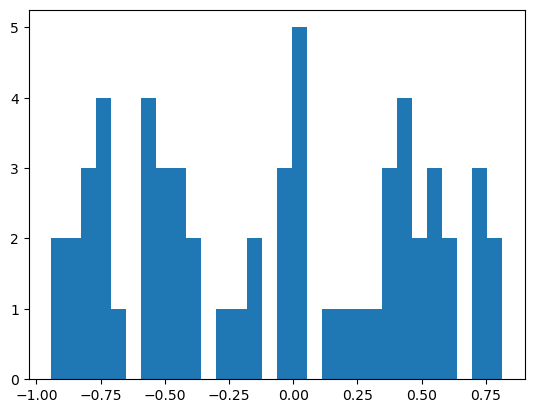

In [ ]:
# Easy version when we don't filter the business source -- seems to be relevant though, but the description
# Get all sources in en

my_date = date.today() - timedelta(days=1) 

return_articles = get_articles_sentiments(keywrd= 'Tesla stock' ,startd = my_date, sources_list = None, show_all_articles= True)
return_articles.Sentiment.hist(bins=30, grid=False)
print(return_articles)
# print(return_articles.Sentiment.mean())
# print(return_articles.Sentiment.count())
# print(return_articles.Description)

In [ ]:
return_articles["Date"] = my_date

In [ ]:
return_articles.head()

,Sentiment,URL,Title,Description,Date
0,0.7003,https://stocknews.com/news/tsla-will-china-be-the-ultimate-downfall-for-tesla-tsla/,Will China Be The Ultimate Downfall For Tesla (TSLA) ?,The recent short covering rally in Tesla stock provides a better price point to position to profit on a further pullback in TSLA.,2023-01-14
1,0.3089,https://www.fool.com/investing/2023/01/14/what-happened-to-tesla-this-week/,What Happened to Tesla This Week?,There's never a dull moment with Tesla.,2023-01-14
2,0.7184,https://www.fool.com/investing/2023/01/15/2-beaten-down-cathie-wood-stocks-bargain-buys/,2 Beaten-Down Cathie Wood Stocks That Could Be Bargain Buys for 2023,Wood is betting on these players for their innovation and high growth potential.,2023-01-14
3,0.0258,https://www.fool.com/investing/2023/01/15/better-buy-costco-vs-target-stock/,Better Buy: Costco Vs. Target Stock,These two retailers have what it takes to outlast a recession.,2023-01-14
4,0.4588,https://www.fool.com/investing/2023/01/14/nike-stock-in-2023-bull-vs-bear/,Nike Stock In 2023: Bull vs. Bear,Can this leading sportswear business satisfy investors this year?,2023-01-14


In [ ]:
return_articles.sort_values(by='Sentiment', ascending=True)[['Sentiment','URL', 'Description','Title']].head(2)

,Sentiment,URL,Description,Title
47,-0.9423,https://www.breitbart.com/tech/2023/01/14/up-in-smoke-elon-musk-breaks-guinness-world-record-for-worst-loss-of-fortune/,"Tesla CEO, Twitter owner, and self-promoter Elon Musk has broken the world record for ""worst loss of fortune,"" according to Guinness World Records.",Up in Smoke: Elon Musk Breaks Guinness World Record for 'Worst Loss of Fortune'
45,-0.9001,https://www.business-standard.com/article/international/elon-musk-rebuffed-in-bid-to-move-misleading-tesla-tweet-trial-to-texas-123011400035_1.html,"A federal judge on Friday rejected Tesla CEO Elon Musk's bid to move or delay a trial over a misleading tweet about a potential buyout of the electric automaker, setting the stage for the mercurial billionaire to be thrust into a legal drama amid the turmoil …",Elon Musk rebuffed in bid to move misleading Tesla tweet trial to Texas


In [ ]:
return_articles.sort_values(by='Sentiment', ascending=False)[['Sentiment','URL', 'Description','Title']].head(2)

,Sentiment,URL,Description,Title
49,0.8126,https://wccftech.com/tesla-says-drivers-saved-more-than-2-billion-in-gas-costs-in-2022/,"Electric vehicle giant Tesla, Inc claims that its cars have enabled drivers to save more than $2 billion in fuel costs in 2022. Tesla shared the data on Twitter earlier this week as part of an upgrade to its application which will now let users see how much e…",Tesla Says Drivers Saved More Than $2 Billion In Gas Costs In 2022
40,0.7845,https://economictimes.indiatimes.com/markets/stocks/news/ahead-of-market-10-things-that-will-decide-stock-action-on-monday/articleshow/97005734.cms,"“The recent recovery in the global markets has failed to impress the participants so far. However, the mood might change if they manage to sustain the gains. To regain some strength, Nifty should decisively cross the 18,100 mark. Meanwhile, participants shoul…",Ahead of Market: 10 things that will decide stock action on Monday


In [ ]:
return_articles.to_csv("TSLA_news_sentiments_"+my_date.isoformat()+".csv")